In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_gender = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [5]:
display(df_gender.head())
display(df_test.head())
display(df_train.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("df_gender shape:", df_gender.shape)
print("df_test shape:", df_test.shape)
print("df_train shape:", df_train.shape)

# Determine the data types of each column
print("\ndf_gender data types:\n", df_gender.dtypes)
print("\ndf_test data types:\n", df_test.dtypes)
print("\ndf_train data types:\n", df_train.dtypes)

# Calculate descriptive statistics for numerical columns
print("\ndf_gender descriptive statistics:\n", df_gender.describe())
print("\ndf_test descriptive statistics:\n", df_test.describe())
print("\ndf_train descriptive statistics:\n", df_train.describe())

# Identify the number of missing values in each column
print("\ndf_gender missing values:\n", df_gender.isnull().sum())
print("\ndf_test missing values:\n", df_test.isnull().sum())
print("\ndf_train missing values:\n", df_train.isnull().sum())

# Analyze the 'Survived' column in df_train
print("\ndf_train 'Survived' value counts:\n", df_train['Survived'].value_counts())

# Analyze categorical columns
print("\ndf_train 'Sex' value counts:\n", df_train['Sex'].value_counts())
print("\ndf_train 'Embarked' value counts:\n", df_train['Embarked'].value_counts())
print("\ndf_train 'Pclass' value counts:\n", df_train['Pclass'].value_counts())
print("\ndf_train 'Cabin' value counts:\n", df_train['Cabin'].value_counts())

print("\ndf_test 'Sex' value counts:\n", df_test['Sex'].value_counts())
print("\ndf_test 'Embarked' value counts:\n", df_test['Embarked'].value_counts())
print("\ndf_test 'Pclass' value counts:\n", df_test['Pclass'].value_counts())
print("\ndf_test 'Cabin' value counts:\n", df_test['Cabin'].value_counts())

df_gender shape: (418, 2)
df_test shape: (418, 11)
df_train shape: (891, 12)

df_gender data types:
 PassengerId    int64
Survived       int64
dtype: object

df_test data types:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

df_train data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

df_gender descriptive statistics:
        PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000 

In [7]:
for df in [df_train, df_test]:
    df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Impute missing 'Embarked' values with the most frequent port
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# Impute missing 'Fare' value in df_test
df_test['Fare'] = df_test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Replace missing 'Cabin' values with 'Unknown'
for df in [df_train, df_test]:
    df['Cabin'] = df['Cabin'].fillna('Unknown')
    
# Handle duplicates
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)
df_gender.drop_duplicates(inplace=True)

# Convert 'Sex' feature to numerical (0 for male, 1 for female)
for df in [df_train, df_test]:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Extract deck information from 'Cabin'
def extract_deck(cabin):
    if cabin == 'Unknown':
        return 'Unknown'
    else:
        return cabin[0]

df_train['Deck'] = df_train['Cabin'].apply(extract_deck)
df_test['Deck'] = df_test['Cabin'].apply(extract_deck)

display(df_train.head())
display(df_test.head())
display(df_gender.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,Unknown


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Unknown,Q,Unknown
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,Unknown,S,Unknown
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Unknown,Q,Unknown
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,Unknown,S,Unknown
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,Unknown,S,Unknown


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
pclass_survival = df_train.groupby('Pclass')['Survived'].mean()
print("Survival rate by passenger class:\n", pclass_survival)

# Analyze survival rates based on sex
sex_survival = df_train.groupby('Sex')['Survived'].mean()
print("\nSurvival rate by sex:\n", sex_survival)

# Analyze survival rates based on age groups
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_survival = df_train.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival rate by age group:\n", age_survival)

# Analyze survival rates based on number of siblings/spouses
sibsp_survival = df_train.groupby('SibSp')['Survived'].mean()
print("\nSurvival rate by SibSp:\n", sibsp_survival)

# Analyze survival rates based on number of parents/children
parch_survival = df_train.groupby('Parch')['Survived'].mean()
print("\nSurvival rate by Parch:\n", parch_survival)

# Analyze survival rates based on fare groups
df_train['FareGroup'] = pd.qcut(df_train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
fare_survival = df_train.groupby('FareGroup')['Survived'].mean()
print("\nSurvival rate by FareGroup:\n", fare_survival)


# Analyze survival rates based on embarkation port
embarked_survival = df_train.groupby('Embarked')['Survived'].mean()
print("\nSurvival rate by Embarked:\n", embarked_survival)

# Analyze survival rates based on deck
deck_survival = df_train.groupby('Deck')['Survived'].mean()
print("\nSurvival rate by Deck:\n", deck_survival)

Survival rate by passenger class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by sex:
 Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Survival rate by age group:
 AgeGroup
Child          0.503597
Young Adult    0.346535
Adult          0.408889
Senior         0.227273
Name: Survived, dtype: float64

Survival rate by SibSp:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival rate by Parch:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Survival rate by FareGroup:
 FareGroup
Low          0.197309
Medium       0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64

Survival rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Survival rate by Deck:
 Deck
A         

C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_17272\4068252423.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df_train.groupby('AgeGroup')['Survived'].mean()
C:\Users\SAIKAT\AppData\Local\Temp\ipykernel_17272\4068252423.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df_train.groupby('FareGroup')['Survived'].mean()


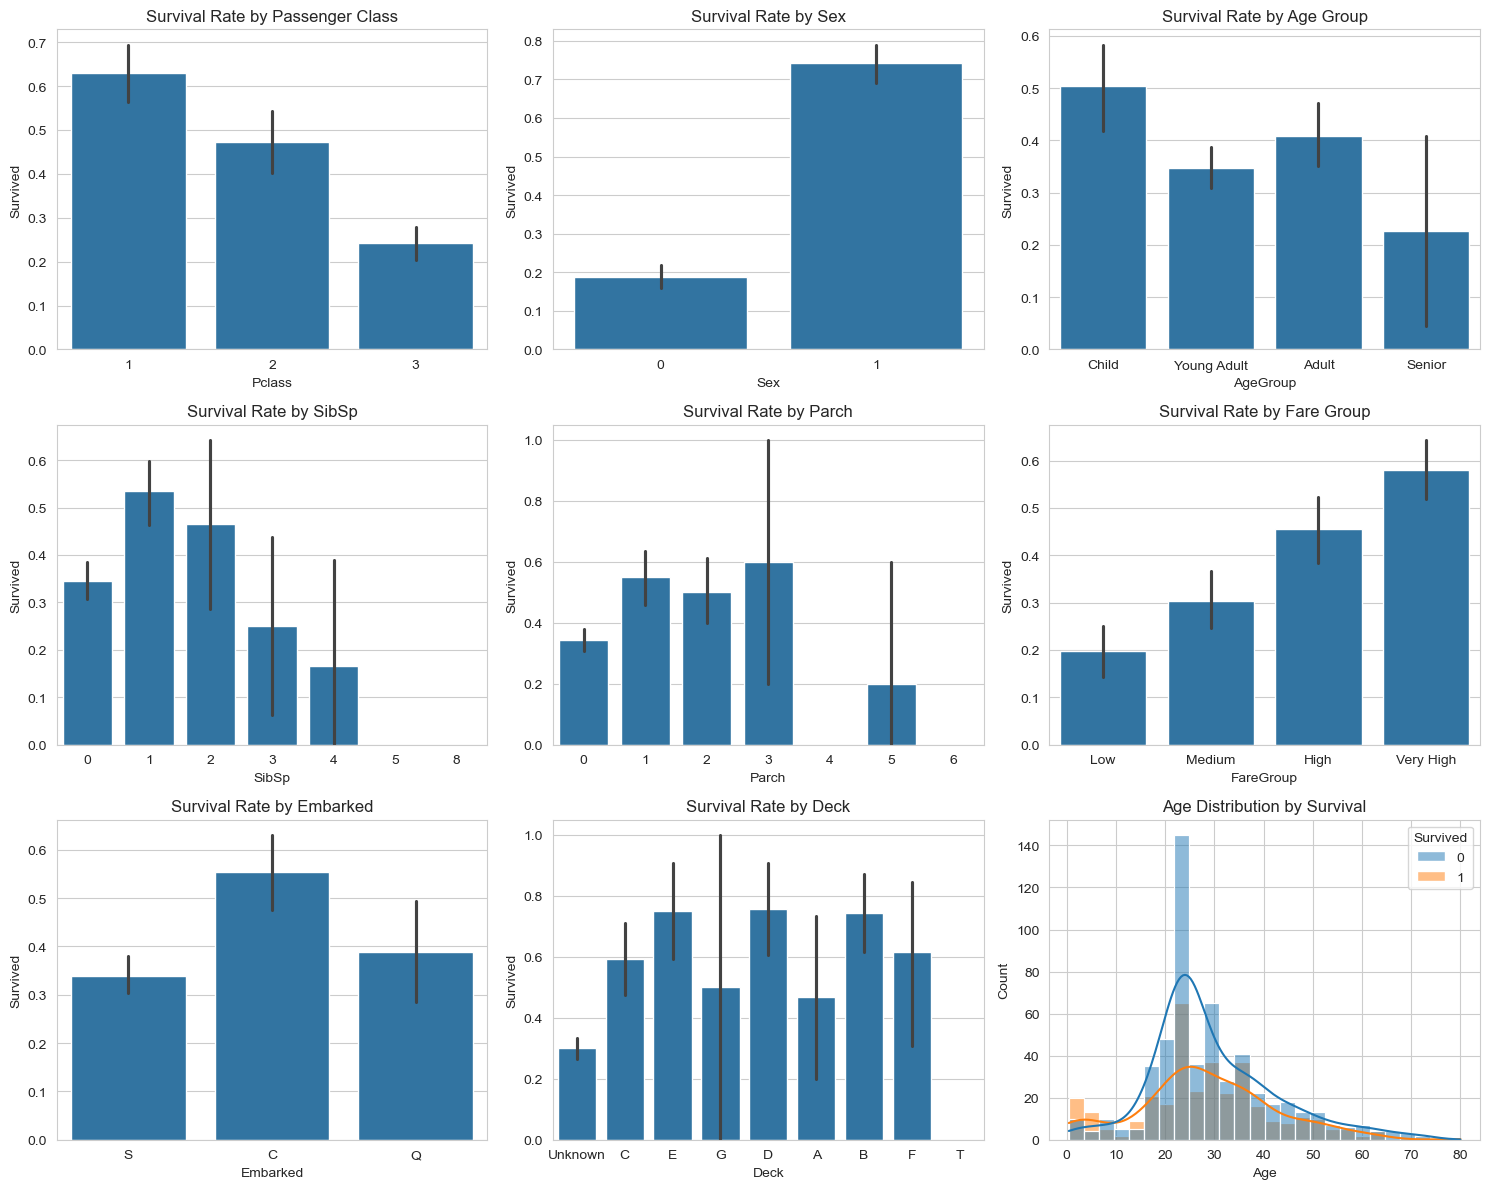

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 12))

# Plot survival rate by passenger class
plt.subplot(3, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Survival Rate by Passenger Class')

# Plot survival rate by sex
plt.subplot(3, 3, 2)
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Survival Rate by Sex')

# Plot survival rate by age group
plt.subplot(3, 3, 3)
sns.barplot(x='AgeGroup', y='Survived', data=df_train)
plt.title('Survival Rate by Age Group')

# Plot survival rate by number of siblings/spouses
plt.subplot(3, 3, 4)
sns.barplot(x='SibSp', y='Survived', data=df_train)
plt.title('Survival Rate by SibSp')
plt.subplot(3, 3, 5)
sns.barplot(x='Parch', y='Survived', data=df_train)
plt.title('Survival Rate by Parch')

# Plot survival rate by fare group
plt.subplot(3, 3, 6)
sns.barplot(x='FareGroup', y='Survived', data=df_train)
plt.title('Survival Rate by Fare Group')

# Plot survival rate by embarkation port
plt.subplot(3, 3, 7)
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.title('Survival Rate by Embarked')

# Plot survival rate by deck
plt.subplot(3, 3, 8)
sns.barplot(x='Deck', y='Survived', data=df_train)
plt.title('Survival Rate by Deck')


# Plot the distribution of Age and its relation to survival
plt.subplot(3, 3, 9)
sns.histplot(x='Age', hue='Survived', data=df_train, kde=True)
plt.title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

In [ ]:
# Data Analysis Key Findings:

In [ ]:
# Passenger Class: Survival rates varied significantly by passenger class, with first-class passengers having the highest survival rate (63%), followed by second-class (47%), and third-class (24%).
# Sex: Females had a much higher survival rate (74%) than males (19%).
# Age: Survival rates varied across age groups, with children having the highest survival rate.
# Fare: Higher fare groups showed higher survival rates.
# Deck: Passengers on decks A and B had significantly higher survival rates than those on other decks or with unknown deck information.